In [2]:
###############################################################################################
####    아래 코드는 전세계 비디오 게임 판매 순위를 기반으로 pandas와 seaborn을 이용한 차트 작업입니다.
###############################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'   #한글 깨짐 현상 방지 코드

df_game = pd.read_csv('vgsales.csv', index_col=0)    # 전세계 비디오 게임 판매 순위 csv파일 읽어오기
df_game.head()  # 자료 출력(일부만)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
print(df_game.info())   # 자료 정보 확인

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [4]:
print(df_game.describe())   # 데이터 요약

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  


In [26]:
# Global Sales의 자료 정리
salesRankG = df_game.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False) # 글로벌 항목 전체의 판매량 집계 및 판매량 기준 내림차순 정렬

salesRankG

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

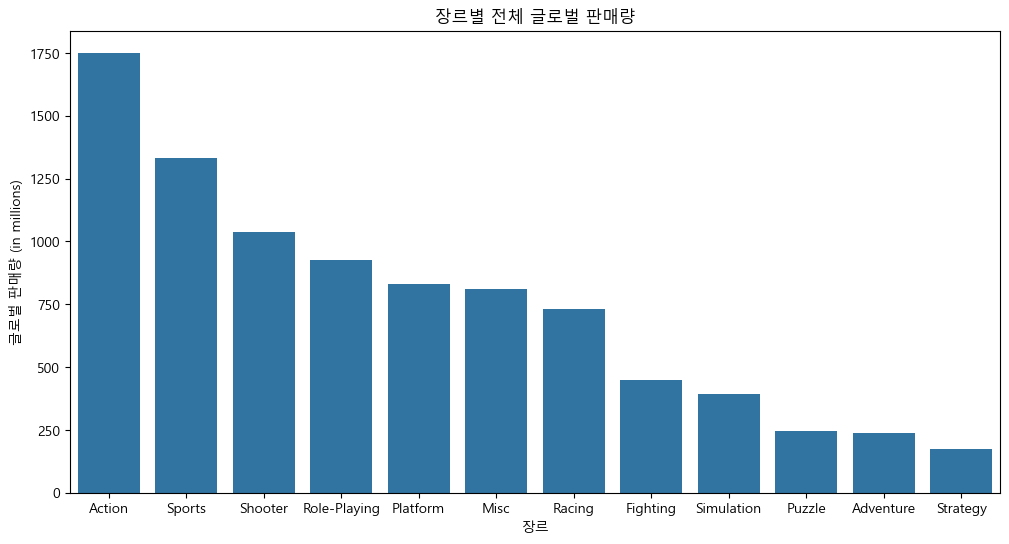

In [5]:
plt.figure(figsize=(12, 6)) # 밑으로 Seaborn 차트를 이용한 시각화 작업
sns.barplot(x=salesRankG.index, y=salesRankG.values)
plt.title('장르별 전체 글로벌 판매량')
plt.xlabel('장르')
plt.ylabel('글로벌 판매량 (in millions)')
plt.show()

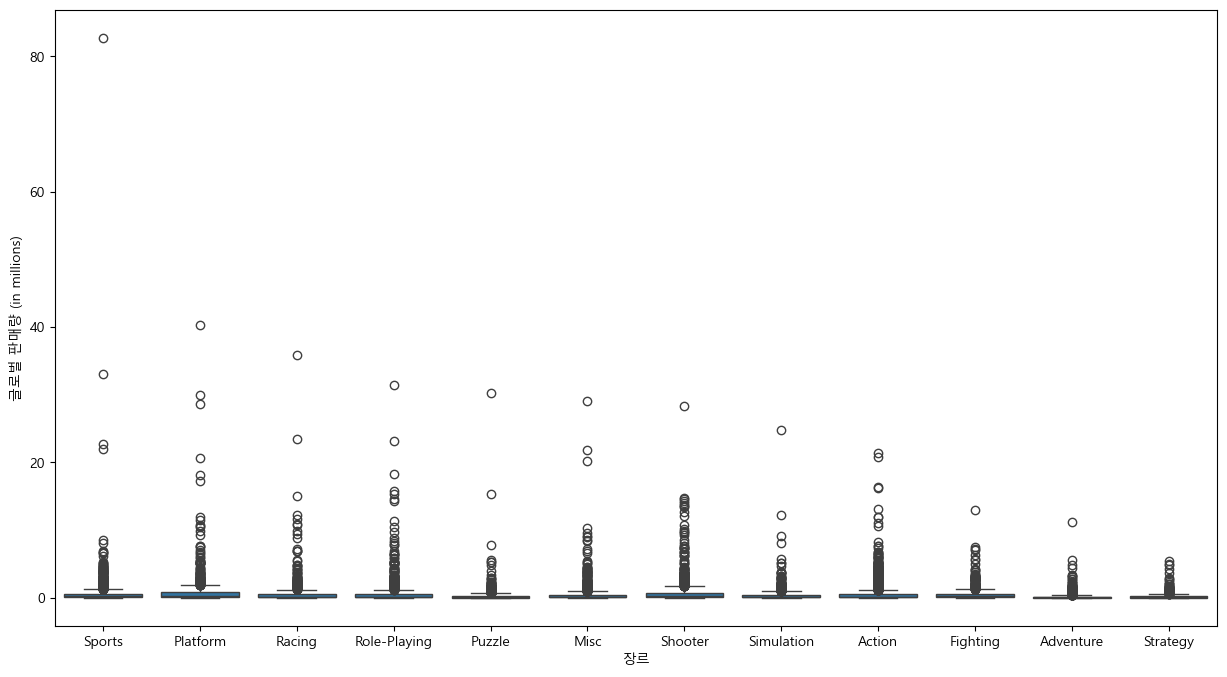

In [6]:
# 이상치 및 이상값 분석
plt.figure(figsize=(15, 8))
sns.boxplot(x='Genre', y='Global_Sales', data=df_game)  #장르별 판매량 이상치 분석 박스플롯 차트 시각화
plt.xlabel('장르')
plt.ylabel('글로벌 판매량 (in millions)')
plt.show()

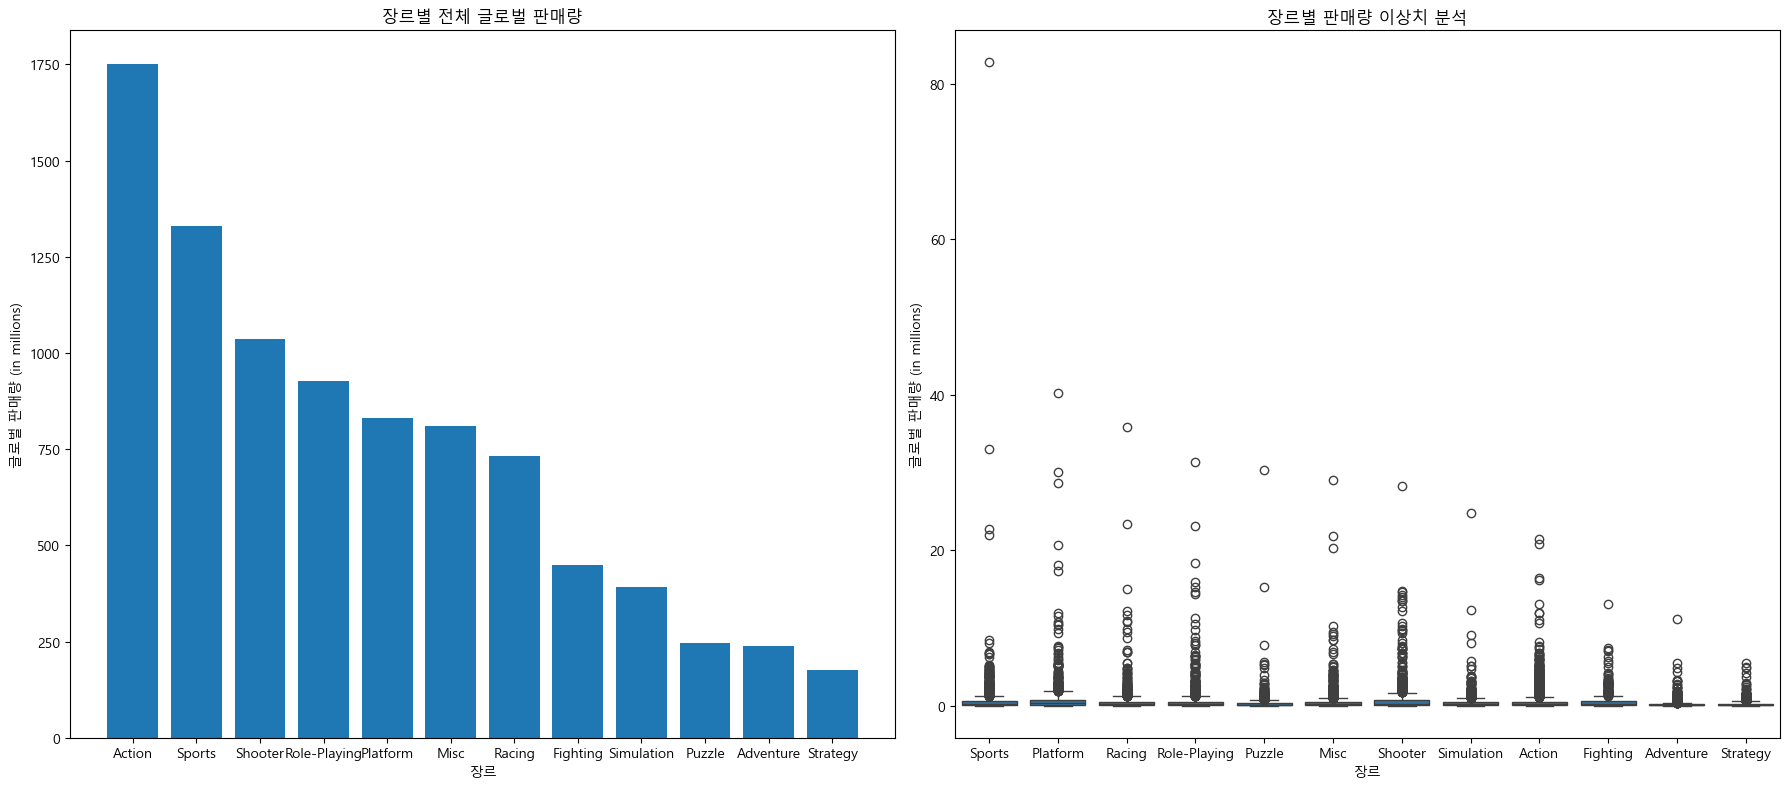

In [7]:
# 위 차트 두 개를 서브플롯으로 합치기
salesRankG = df_game.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) # 서브플롯 생성

axes[0].bar(salesRankG.index, salesRankG.values)   # 첫 번째 서브플롯 - Bar Plot
axes[0].set_title('장르별 전체 글로벌 판매량')
axes[0].set_xlabel('장르')
axes[0].set_ylabel('글로벌 판매량 (in millions)')

sns.boxplot(x='Genre', y='Global_Sales', data=df_game, ax=axes[1])  # 두 번째 서브플롯 - Box Plot
axes[1].set_title('장르별 판매량 이상치 분석')
axes[1].set_xlabel('장르')
axes[1].set_ylabel('글로벌 판매량 (in millions)')

plt.tight_layout()
plt.show()

In [25]:
# Global Sales를 제외한 나머지 자료의 지역별 판매량
salesRankR = df_game[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()   # 지역별 판매 동향 분석 및 판매량의 합

salesRankR

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

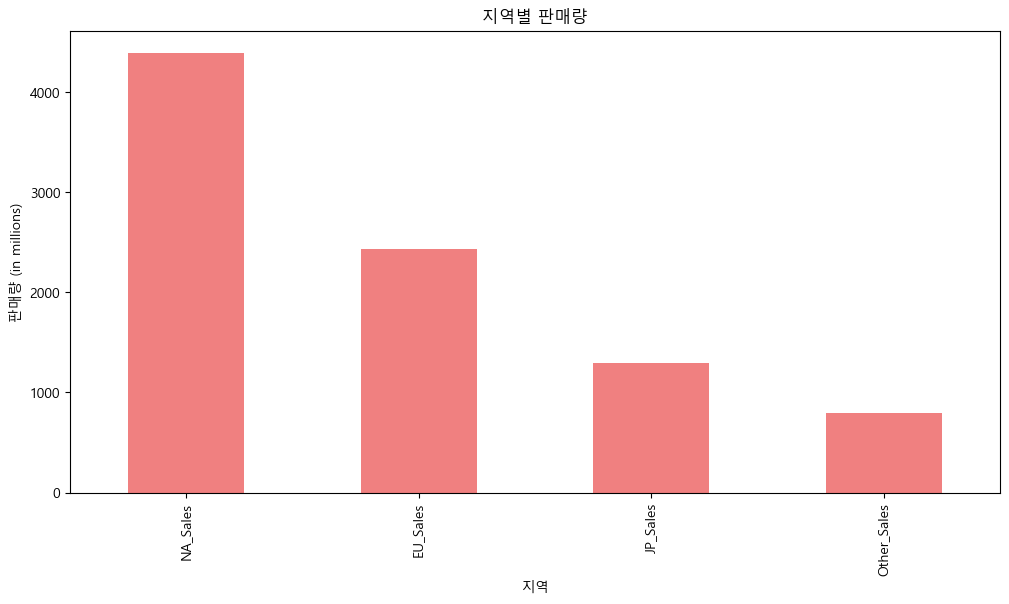

In [8]:
salesRankR.plot(kind='bar', figsize=(12, 6), color='lightcoral')  # 밑으로 Pandas에서 DataFrame의 차트를 이용한 시각화 작업
plt.title('지역별 판매량')
plt.xlabel('지역')
plt.ylabel('판매량 (in millions)')
plt.show()

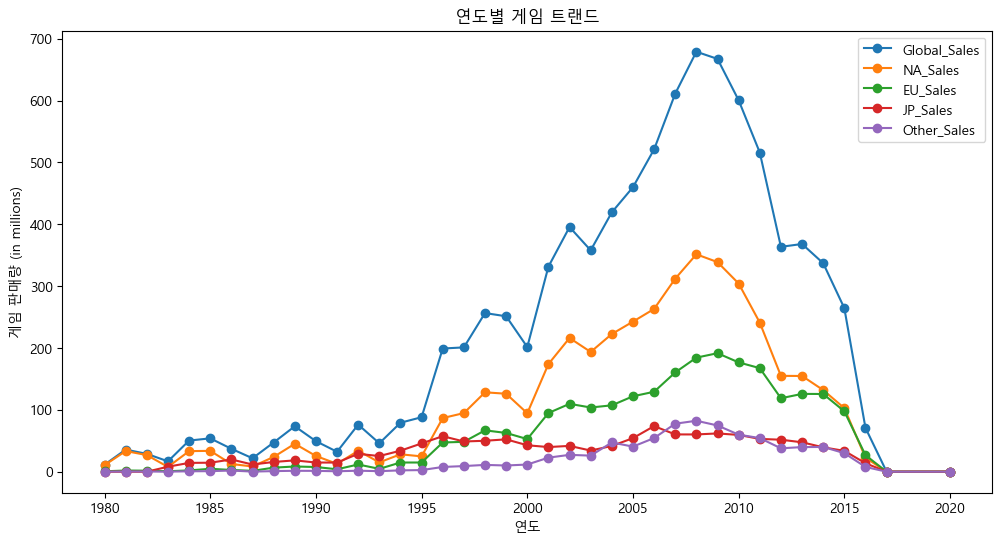

In [9]:
# 연도별 게임 트랜드 분석
yearlyTrend = df_game.groupby('Year')['Global_Sales'].sum()
columns_to_sum = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']    # 지역별로 나오는 차트를 추가하기 위한 부분

yearlyTrend = df_game.groupby('Year')[['Global_Sales'] + columns_to_sum].sum() # 연도별 트랜드 집계 및 합산

yearlyTrend.plot(kind='line', marker='o', figsize=(12, 6)) # 차트 시각화 작업
plt.title('연도별 게임 트랜드')
plt.xlabel('연도')
plt.ylabel('게임 판매량 (in millions)')
plt.show()


In [28]:
# 게임사별 글로벌 판매량 분석
platform_sales = df_game.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False) # 게임사별 글로벌 판매량 합산 및 내림차순 정렬

platform_sales

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

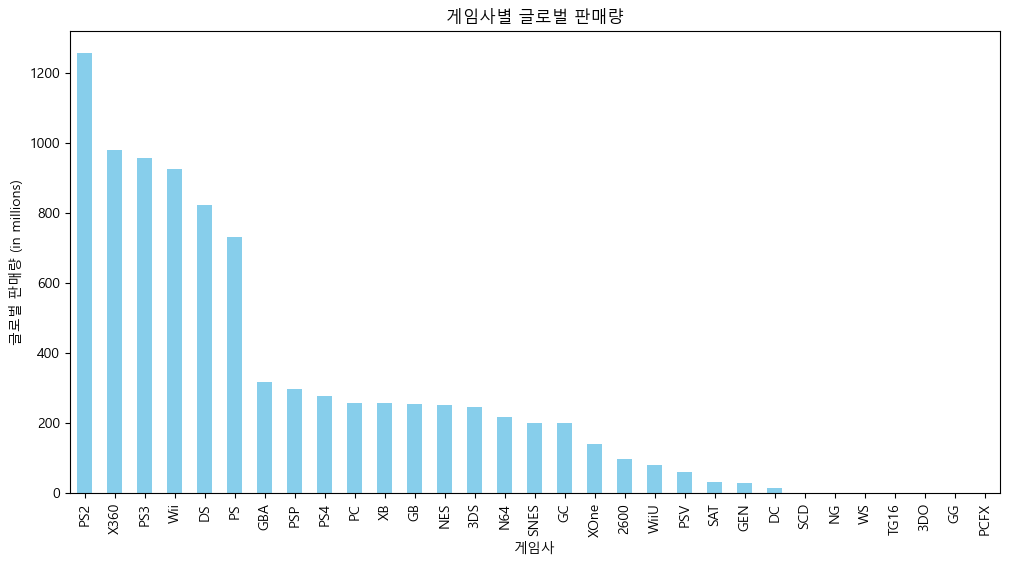

In [10]:
salesRank = df_game.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)  # 차트 시각화 작업
salesRank.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('게임사별 글로벌 판매량')
plt.xlabel('게임사')
plt.ylabel('글로벌 판매량 (in millions)')
plt.show()

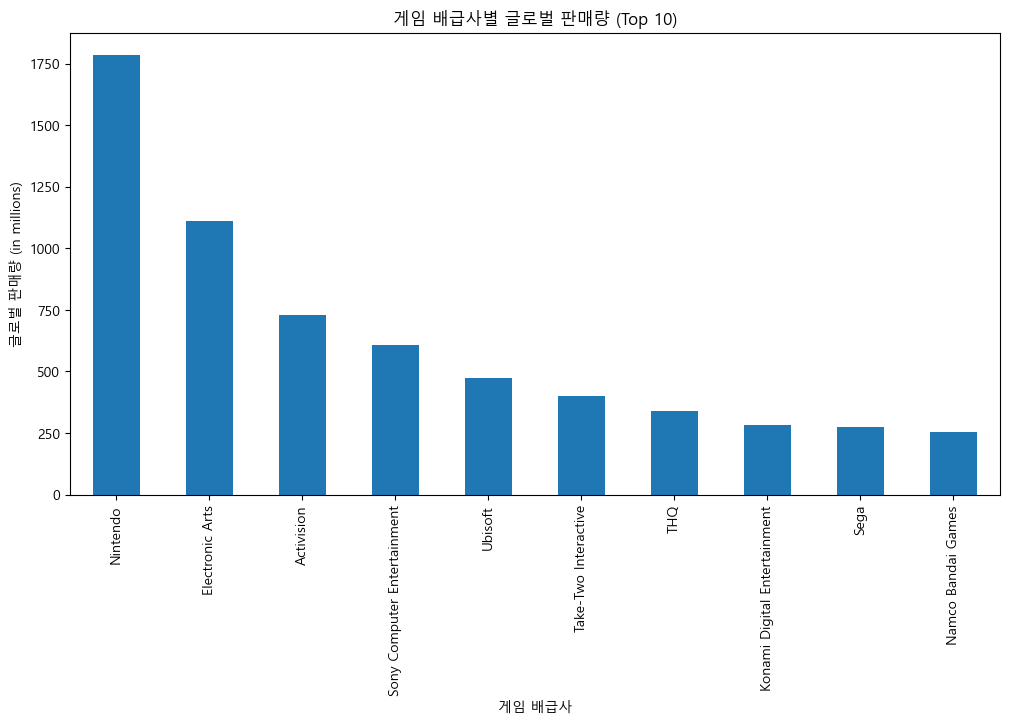

In [11]:
# 게임 배급사 Top 10의 
gamePb = df_game.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)    # 게임 배급사의 게임 수 합계 및 정렬

top_publishers = gamePb.head(10)    # 상위 10개의 게임만 표시

top_publishers.plot(kind='bar', figsize=(12, 6))    #차트로 시각화
plt.title('게임 배급사별 글로벌 판매량 (Top 10)')
plt.xlabel('게임 배급사')
plt.ylabel('글로벌 판매량 (in millions)')
plt.show()